## Importacion de librerias

In [1]:
from pyspark.sql import SparkSession
from pyspark import SparkFiles

## Creacion de sesion

In [2]:
spark = SparkSession.builder.appName('ML2_example').getOrCreate()

## URL desde uci usando carbon_nanotubes

In [3]:
url="https://archive.ics.uci.edu/ml/machine-learning-databases/00448/carbon_nanotubes.csv"

## Comprobar si el url es el correcto y si la estraccion del archivo se realiza

In [4]:
spark.sparkContext.addFile(url)
print(url)

https://archive.ics.uci.edu/ml/machine-learning-databases/00448/carbon_nanotubes.csv


In [5]:
a= SparkFiles.get("carbon_nanotubes.csv")

In [6]:
print(a)

C:\Users\Rizo\AppData\Local\Temp\spark-4cf8dcd0-d058-4246-a085-78c0393a8080\userFiles-745c13bb-1c1a-4ba1-878b-0a72089e127d\carbon_nanotubes.csv


In [7]:
training = spark.read.csv(SparkFiles.get("carbon_nanotubes.csv"), header=True,inferSchema= True,sep=';',)


In [8]:
training.show()

+---------------+---------------+---------------------------+---------------------------+---------------------------+--------------------------------+--------------------------------+--------------------------------+
|Chiral indice n|Chiral indice m|Initial atomic coordinate u|Initial atomic coordinate v|Initial atomic coordinate w|Calculated atomic coordinates u'|Calculated atomic coordinates v'|Calculated atomic coordinates w'|
+---------------+---------------+---------------------------+---------------------------+---------------------------+--------------------------------+--------------------------------+--------------------------------+
|              2|              1|                   0,679005|                   0,701318|                   0,017033|                        0,721039|                        0,730232|                        0,017014|
|              2|              1|                   0,717298|                   0,642129|                   0,231319|               

In [9]:
training.printSchema()

root
 |-- Chiral indice n: integer (nullable = true)
 |-- Chiral indice m: integer (nullable = true)
 |-- Initial atomic coordinate u: string (nullable = true)
 |-- Initial atomic coordinate v: string (nullable = true)
 |-- Initial atomic coordinate w: string (nullable = true)
 |-- Calculated atomic coordinates u': string (nullable = true)
 |-- Calculated atomic coordinates v': string (nullable = true)
 |-- Calculated atomic coordinates w': string (nullable = true)



## Transformar datos string a datos decimales

In [10]:
import pyspark.sql.functions as F

training=training.withColumn("Initial atomic coordinate u",F.regexp_replace(training['Initial atomic coordinate u'], ',', '.').cast('decimal(12,6)'))

In [11]:
training.printSchema()

root
 |-- Chiral indice n: integer (nullable = true)
 |-- Chiral indice m: integer (nullable = true)
 |-- Initial atomic coordinate u: decimal(12,6) (nullable = true)
 |-- Initial atomic coordinate v: string (nullable = true)
 |-- Initial atomic coordinate w: string (nullable = true)
 |-- Calculated atomic coordinates u': string (nullable = true)
 |-- Calculated atomic coordinates v': string (nullable = true)
 |-- Calculated atomic coordinates w': string (nullable = true)



In [12]:
training.show()

+---------------+---------------+---------------------------+---------------------------+---------------------------+--------------------------------+--------------------------------+--------------------------------+
|Chiral indice n|Chiral indice m|Initial atomic coordinate u|Initial atomic coordinate v|Initial atomic coordinate w|Calculated atomic coordinates u'|Calculated atomic coordinates v'|Calculated atomic coordinates w'|
+---------------+---------------+---------------------------+---------------------------+---------------------------+--------------------------------+--------------------------------+--------------------------------+
|              2|              1|                   0.679005|                   0,701318|                   0,017033|                        0,721039|                        0,730232|                        0,017014|
|              2|              1|                   0.717298|                   0,642129|                   0,231319|               

## Transformacion de todas las columnas  a decimal

In [13]:

training=training.withColumn("Initial atomic coordinate v",F.regexp_replace(training['Initial atomic coordinate v'], ',', '.').cast('decimal(12,6)'))
training=training.withColumn("Initial atomic coordinate w",F.regexp_replace(training['Initial atomic coordinate w'], ',', '.').cast('decimal(12,6)'))
training=training.withColumn("Calculated atomic coordinates u'",F.regexp_replace(training["Calculated atomic coordinates u'"], ',', '.').cast('decimal(12,6)'))
training=training.withColumn("Calculated atomic coordinates v'",F.regexp_replace(training["Calculated atomic coordinates v'"], ',', '.').cast('decimal(12,6)'))
training=training.withColumn("Calculated atomic coordinates w'",F.regexp_replace(training["Calculated atomic coordinates w'"], ',', '.').cast('decimal(12,6)'))

In [14]:
training.printSchema()

root
 |-- Chiral indice n: integer (nullable = true)
 |-- Chiral indice m: integer (nullable = true)
 |-- Initial atomic coordinate u: decimal(12,6) (nullable = true)
 |-- Initial atomic coordinate v: decimal(12,6) (nullable = true)
 |-- Initial atomic coordinate w: decimal(12,6) (nullable = true)
 |-- Calculated atomic coordinates u': decimal(12,6) (nullable = true)
 |-- Calculated atomic coordinates v': decimal(12,6) (nullable = true)
 |-- Calculated atomic coordinates w': decimal(12,6) (nullable = true)



In [15]:
training.show()

+---------------+---------------+---------------------------+---------------------------+---------------------------+--------------------------------+--------------------------------+--------------------------------+
|Chiral indice n|Chiral indice m|Initial atomic coordinate u|Initial atomic coordinate v|Initial atomic coordinate w|Calculated atomic coordinates u'|Calculated atomic coordinates v'|Calculated atomic coordinates w'|
+---------------+---------------+---------------------------+---------------------------+---------------------------+--------------------------------+--------------------------------+--------------------------------+
|              2|              1|                   0.679005|                   0.701318|                   0.017033|                        0.721039|                        0.730232|                        0.017014|
|              2|              1|                   0.717298|                   0.642129|                   0.231319|               

## Importar librerias de matplotlib para graficar

In [16]:
import matplotlib.pyplot as plt


In [17]:
p1=training.toPandas()


In [27]:
X = p1['Initial atomic coordinate u']
Y= p1["Calculated atomic coordinates u'"]

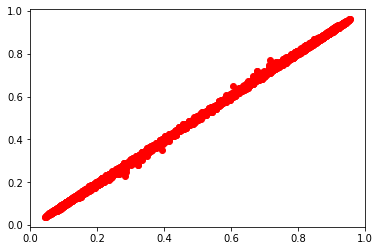

In [28]:
plt.scatter(X,Y, color="red")


## Importar librerias de spark.ml.feature 

In [29]:
from pyspark.ml.feature import VectorAssembler
feature_assembler = VectorAssembler(inputCols=["Initial atomic coordinate u","Calculated atomic coordinates u'"], outputCol = "feature_vector")

In [30]:
output = feature_assembler.transform(training)

In [31]:
output.show()

+---------------+---------------+---------------------------+---------------------------+---------------------------+--------------------------------+--------------------------------+--------------------------------+-------------------+
|Chiral indice n|Chiral indice m|Initial atomic coordinate u|Initial atomic coordinate v|Initial atomic coordinate w|Calculated atomic coordinates u'|Calculated atomic coordinates v'|Calculated atomic coordinates w'|     feature_vector|
+---------------+---------------+---------------------------+---------------------------+---------------------------+--------------------------------+--------------------------------+--------------------------------+-------------------+
|              2|              1|                   0.679005|                   0.701318|                   0.017033|                        0.721039|                        0.730232|                        0.017014|[0.679005,0.721039]|
|              2|              1|                   

In [32]:
output.columns

['Chiral indice n',
 'Chiral indice m',
 'Initial atomic coordinate u',
 'Initial atomic coordinate v',
 'Initial atomic coordinate w',
 "Calculated atomic coordinates u'",
 "Calculated atomic coordinates v'",
 "Calculated atomic coordinates w'",
 'feature_vector']

In [33]:
dataset = output.select("feature_vector","Chiral indice n")

In [34]:
dataset.show()

+-------------------+---------------+
|     feature_vector|Chiral indice n|
+-------------------+---------------+
|[0.679005,0.721039]|              2|
|[0.717298,0.738414]|              2|
|[0.489336,0.477676]|              2|
|[0.413957,0.408823]|              2|
|[0.334292,0.303349]|              2|
|[0.510664,0.496977]|              2|
|[0.413957,0.390878]|              2|
|[0.712552,0.750056]|              2|
|[0.320995,0.281301]|              2|
| [0.394742,0.35086]|              2|
|[0.282702,0.229138]|              2|
|[0.320995,0.278752]|              2|
|[0.605258,0.613415]|              2|
|[0.510664,0.521991]|              2|
|[0.679005,0.718811]|              2|
|[0.605258,0.649178]|              2|
|[0.665708,0.680389]|              2|
|[0.712552,0.737216]|              2|
|[0.586043,0.591153]|              2|
|[0.665708,0.697242]|              2|
+-------------------+---------------+
only showing top 20 rows



## Importacion de librerias para la regresion lineal

In [35]:
from pyspark.ml.regression import LinearRegression
train_data,test_data = dataset.randomSplit([0.75,0.25])

In [36]:
train_data.show()

+-------------------+---------------+
|     feature_vector|Chiral indice n|
+-------------------+---------------+
|[0.045149,0.038504]|             12|
|[0.046336,0.038757]|             12|
|[0.046336,0.040047]|             12|
| [0.046505,0.04049]|             12|
|[0.046505,0.042528]|             12|
| [0.05006,0.043038]|             12|
| [0.05006,0.044671]|             12|
|[0.050398,0.046617]|             12|
|[0.050398,0.046787]|             12|
|[0.054695,0.045561]|             12|
|  [0.0563,0.050443]|             12|
|[0.056805,0.055081]|             12|
|[0.057293,0.050475]|             12|
|[0.057293,0.053505]|             12|
|[0.057712,0.054537]|             10|
|[0.057933,0.054456]|             10|
|[0.057945,0.054974]|             10|
| [0.058609,0.05414]|             10|
|[0.058609,0.056117]|             10|
|[0.058632,0.053762]|             10|
+-------------------+---------------+
only showing top 20 rows



In [37]:
test_data.show()

+-------------------+---------------+
|     feature_vector|Chiral indice n|
+-------------------+---------------+
|[0.045149,0.038741]|             12|
|[0.054695,0.051358]|             12|
|[0.055182,0.046241]|             12|
|[0.055182,0.049931]|             12|
|[0.055832,0.048353]|             12|
|[0.055832,0.053515]|             12|
|  [0.0563,0.050196]|             12|
|[0.056805,0.054358]|             12|
|[0.057712,0.054158]|             10|
|[0.057933,0.053252]|             10|
|[0.057945,0.053361]|             10|
| [0.05859,0.051167]|             12|
| [0.05859,0.053298]|             12|
|[0.059738,0.056166]|             10|
|[0.060727,0.056554]|             12|
|[0.060727,0.056554]|             12|
|[0.060946,0.055301]|             12|
|[0.060946,0.055301]|             12|
|[0.061019,0.053985]|             12|
|[0.062959,0.060005]|             12|
+-------------------+---------------+
only showing top 20 rows



In [38]:
regressor = LinearRegression(featuresCol="feature_vector",labelCol="Chiral indice n")
regressor = regressor.fit(train_data)

In [39]:
pred_results = regressor.evaluate(test_data)

In [40]:
p2=pred_results.predictions

C:\Users\Rizo\.virtualenvs\env-YoQODTt_\lib\site-packages\pyspark\sql\context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [41]:
p2.show()

+-------------------+---------------+-----------------+
|     feature_vector|Chiral indice n|       prediction|
+-------------------+---------------+-----------------+
|[0.045149,0.038741]|             12|8.195673110081508|
|[0.054695,0.051358]|             12|8.208359454551669|
|[0.055182,0.046241]|             12|8.185278515874918|
|[0.055182,0.049931]|             12|8.200477590606814|
|[0.055832,0.048353]|             12| 8.19130299416236|
|[0.055832,0.053515]|             12|8.212565222825246|
|  [0.0563,0.050196]|             12| 8.19696841628828|
|[0.056805,0.054358]|             12| 8.21203351772288|
|[0.057712,0.054158]|             10|8.207477303664254|
|[0.057933,0.053252]|             10|8.202836056284537|
|[0.057945,0.053361]|             10|8.203235644774558|
| [0.05859,0.051167]|             12|8.191544325829422|
| [0.05859,0.053298]|             12|8.200321894461853|
|[0.059738,0.056166]|             10|8.207410998594035|
|[0.060727,0.056554]|             12|8.204939310

In [42]:
p2.columns

['feature_vector', 'Chiral indice n', 'prediction']

In [43]:
pred_results.meanAbsoluteError,pred_results.meanSquaredError

(1.71359945160923, 4.468784691202665)